<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Cat_and_Dog_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Upload the kaggle API credentials JSON file
files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:01<00:00, 176MB/s]
100% 218M/218M [00:01<00:00, 170MB/s]


In [ ]:
! unzip cat-and-dog.zip -d cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt
plt.style.use("ggplot")
cat_files =glob("cat-and-dog/training_set/training_set/cats/*.jpg")
dog_files =glob("cat-and-dog/training_set/training_set/dogs/*.jpg")

In [ ]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((333, 499, 3), (333, 499, 3))

In [ ]:
img_mpl

array([[[116,  69, 101],
        [115,  69,  98],
        [123,  79, 104],
        ...,
        [ 60,  30,  30],
        [ 59,  31,  28],
        [ 60,  32,  29]],

       [[119,  74, 105],
        [117,  72, 101],
        [126,  82, 107],
        ...,
        [ 69,  39,  39],
        [ 68,  40,  37],
        [ 69,  41,  38]],

       [[113,  70, 100],
        [107,  67,  94],
        [117,  77, 101],
        ...,
        [ 70,  38,  39],
        [ 69,  39,  37],
        [ 69,  39,  37]],

       ...,

       [[ 98,  58,  33],
        [105,  68,  42],
        [100,  60,  35],
        ...,
        [109,  63,  47],
        [107,  64,  45],
        [106,  63,  44]],

       [[106,  66,  40],
        [112,  72,  46],
        [101,  61,  35],
        ...,
        [107,  62,  43],
        [105,  62,  43],
        [105,  62,  43]],

       [[ 97,  56,  28],
        [107,  66,  38],
        [101,  59,  34],
        ...,
        [104,  59,  40],
        [102,  60,  38],
        [103,  61,  39]]

In [ ]:
img_mpl.max()

252

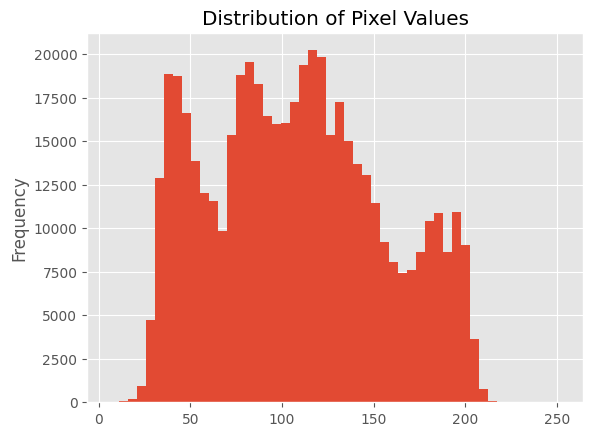

In [ ]:
pd.Series(img_mpl.flatten()).plot(kind="hist",
                                  bins=50,
                                  title="Distribution of Pixel Values")
plt.show()

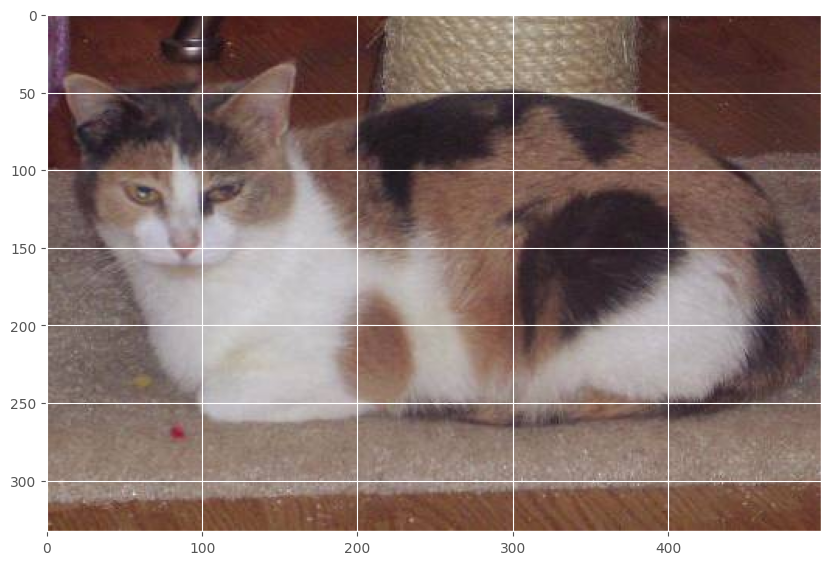

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
#ax.axis("off")
plt.show()

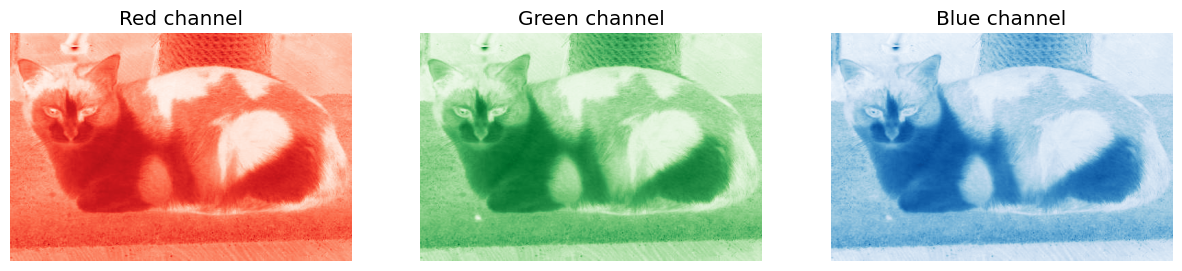

In [ ]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:, :,0], cmap="Reds")
axs[1].imshow(img_mpl[:, :,1], cmap="Greens")
axs[2].imshow(img_mpl[:, :,2], cmap="Blues")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title("Red channel")
axs[1].set_title("Green channel")
axs[2].set_title("Blue channel")
plt.show()

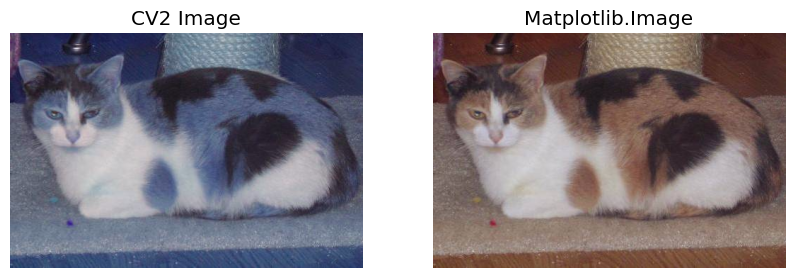

In [ ]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis("off")
axs[1].axis("off")
axs[0].set_title("CV2 Image")
axs[1].set_title("Matplotlib.Image")
plt.show()

In [ ]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis("off")
plt.show()

NameError: name 'cv2' is not defined